<Axes: xlabel='クラスター', ylabel='count'>

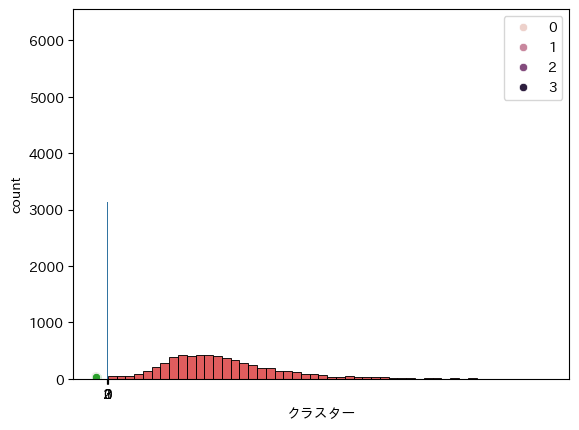

In [15]:
"""
クラスタリングとは、データ同士の類似性にもとづき、データをいくつかのグループに分ける分析手法です。グループ分けされたまとまり。
クラスタリングのメリットは、得られた結果から自由に考察をし、新たな気づきや知見を得られる。
  ・ECサイトの販売データに対してクラスタリングを行い、今までになかった新たな切り口でプロモーションを行う
  ・地域の住民データに対してクラスタリングを行い、地方創成活動のビジネスアイデアの検討に生かす
教師なし学習とは、説明変数や目的変数といった区分のないデータで学習することです。手元のデータから、何かしらの法則を見つけることを目的としています。
"""
#1. 課題把握とゴールの設定:
#想定する過程：
# ・カリフォルニアで飲食店の新ビジネスを立ち上げたい
# ・カリフォルニアの住宅データがあるので、それをもとに何かヒントを得たい
#分析のゴールを以下の様に設定：
# ・カリフォルニアの住宅データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

#2. 必要なライブラリのインポート
import pandas as pd
import seaborn as sns
import japanize_matplotlib  #pip install japanize-matplotlibを実行
#california_housing_cleansing.csvをアップロード
df = pd.read_csv('sample_data/california_housing_cleansing.csv')
df.head()
#「Unnamed: 0」列は利用しない情報なので、削除
df = df.drop(columns = ['Unnamed: 0'])
df.head()
#念のため「california_housing_cleansing.csv」の全18572行のデータが取り込まれているか確認
df.shape
#各要素の標準化を実施。まずは、StandardScalerクラスのインポートとインスタンス化を実施
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#全データを変数Xに代入し、引数に指定してfitメソッドを実行し標準化の変換モデルを生成する。
X = df.to_numpy()
scaler.fit(X)
#上記この変換モデルを利用して、Xを標準化させる。
X_scaled  = scaler.transform(X)
X_scaled

#4. データセットのクラスタリング
#scikit-learnには、k-means法のためのクラスが提供されています。clusterモジュールの KMeansクラスをインポート
from sklearn.cluster import KMeans
#KMeansクラスをインスタンス化、今回は、クラスター数「4」を指定することとする。
model = KMeans(n_clusters=4, random_state=0)
#標準化済みデータX_scaledを用いてクラスタリングを実行
model.fit(X_scaled)
#クラスタリングの結果を表示
model.labels_
#取り込んだデータセットに、クラスター列としてラベル情報を追加
df['クラスター'] = model.labels_
df.head()

#クラスタリング結果に対する考察
"""
課題
カリフォルニアで飲食店の新ビジネスを立ち上げたい
カリフォルニアの住宅データがあるので、それをもとに何かヒントを得たい
ゴール
カリフォルニアの住宅データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす
"""
#1. クラスター別のデータ数の確認
#4つのクラスターがそれぞれ、どの程度のデータ数を保持しているか確認
sns.countplot(x='クラスター', data=df)
#2. クラスター別の平均値の比較
df.groupby('クラスター').mean()
#3. 各クラスターと緯度経度の関係の確認
#各データを緯度と経度でマッピングしてみましょう。seabornのscatterplot関数を利用
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)
#4. 特定のクラスターに的を絞った深掘り
#富裕層のクラスターと考えられるクラスター3に絞って、緯度と経度でマッピング
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)
#クラスター3に属するデータの地域人口分布を、ヒストグラムで表示
sns.histplot(x='地域人口', data=df_cluster3, bins=50)

In [1]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4c3efdf77d79fe07c64d6bf7285c041cf00d8f089abe2a7f1d8091d72f430e0a
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib
